# NYPD Civilian Complaints

### The Data
The data and data dictionary is downloadable [here](https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers).



# Summary of Findings

### Introduction
ProPublica requested and obtained the records of the New York City Police Department's civilian complaints after the statute that had previously kept this infromation secret was repealed by New York state. By utilizing the Civilian Complaints Against New York City Police Officers dataset provided by ProPublica, I will be answering the question: are the unnecessary physical force complaints in New York City of white complainants more successful than non-white? The dataset contains 33,358 civilian complaints filed from September 1985 to January 2020. The columns that will be focused on are mos_ethnicity(officer's ethnicity),mos_gender, complainant_ethnicity, fado_type(general complaint category) allegation(specific allegation), board_disposition(official ruling by the Civilian Complaint Review Board), and the date columns for when the complaint was recieved. The CCRB's dispositions are either substantiated(officer violated rules), exonerated(officer did not violate rules), and unsubstantiated(inconclusive).

### Cleaning and EDA
Initially, a dataset was created that filtered the large, original to only include those with a fado_type of "Force" and the columns that will be needed. The month and year columns were merged into a datetime column called "date". The initial dataframe only contained 845 missing values for complainant_ethnicity but this became 1170 when "Unknown" and "Refused" were changed to np.NaN as these values are essentially missing. These values remained in the initial dataframe to use for missingness assessment but a new dataframe was created that dropped these null values in order to use for further EDA. Here,a new column was created by grouping complainant_ethnicities by white or non-white. In this new dataframe with no null values, it was found that allegations from black and then hispanic complainants were overwhelmingly more likely than other ethnicities. Additionally, white officers and then hispanic officers receieved the most excessive force allegations. Excessive force allegations made remained over 300 consistently since 2005 but dipped in 2019 possibly as a result of increase social justice attention, body cams, or legislative efforts for police accountability(more info and data needed for these questions). Perhaps unsurprisingly, the CCRB only substantiates very little excessive force allegations. However, of those that are substantiated, white complainants have 13.5% of their excessive force allegations substantiated while non-white have 10.7%. 

### Assessment of Missingness
The complainant_ethnicity column is important in answering the question and with the original NaN values with the unknown and refused responses changed to NaN it contains 1170 missing values. I believe the values are MAR and not NMAR as it is likely the complainants would not want to identify their ethnicity depending on the officer's ethnicity, anonymity, or a belief that it would affect the outcome of the allegation. Data that may helpful here would be method in which the allegation was made(phone,in-person,email,...). 

Permutation test were conducted to test the dependency of the missingness of complainant_ethnicity on other columns. For the column mos_ethnicity(officer ethnicity) a TVD test was used as complainant_ethnicity is categorical along with a significance level of 0.01 and found a p-value of 0. This means that the missingness of the complainant_ethnicity is related to the mos_ethnicity. For the column mos_gender(officer gender), a p-value of 0.021 was found which is greater than our significance level. The missingness of complainant_ethnicity is not dependent on the officer's gender.

Significantly, this means that complainant_ethnicity is not missing completely at random and instead is missing at random with a dependence on mos_ethnicity. In respect to the research question and previous data analysis, this implicates that the dominant number of allegations aimed at white officers can be effecting the number of complainants who identify their ethnicity which can directly affect any analysis as missing values comprise of 1/7 of our excessive force dataframe.

### Hypothesis Test
The null hypothesis for the hypothesis test is that the distribution of the NYPD civilian excessive force complaints that are found to be substantiated is similar among those who identified themselves as white and those who did not. Any difference found between the two would be as a result of chance. In turn, the alternative hypothesis is that the distributions of NYPD substantiated excessive force complaints are different amongst the two. By finding if there is significant difference between the distributions of the substantiated excessive force claims, these hypotheses will answer the question of whether white complaints are significantly substantiated more often than non-white complaints. Due to the variables that will be tested being both categorical variables, the test statistic will be the total variation data (TVD). In order to reduce the probability of a Type-1 error, the significance level will be set to a low 0.01. 

After performing the test, the resulting p-value was found to be 0 which means we can reject the null hypothesis that the distribution of the NYPD civilian excessive force complaints that are found to be substantiated is similar among those who identified themselves as white and those who did not. Additionally, a similar hypothesis test was conducted but instead the complainant ethnicities were left ungrouped. Similarly, a p-value of 0 was found and the distributions were found to be significantly different.

With regards to the overall research question, our initial hypothesis test supports that NYPD excessive force complaints are proportionally substantiated more often if the complainant identified themselves as white.

# Code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

Reading in data provided by ProPublica.

In [ ]:
#Read in data
allegations=pd.read_csv("allegations_202007271729.csv")
allegations.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


Initial dataframe number of elements and variables.

In [ ]:
#Number of elements and variables
allegations.shape

(33358, 27)

The research question specifies excessive force complaints so we will create a new dataframe with this filter in mind.

In [ ]:
#Filtering to only complaints of physical force
physical=allegations[allegations["fado_type"]=="Force"]
physical.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)
13,10026,Brian,Alexander,079 DET,3185,26353,8,2012,2,2014,...,27,Black,Male,35.0,Force,Pepper spray,79.0,PD suspected C/V of violation/crime - street,Arrest - OGA,Unsubstantiated
14,10026,Brian,Alexander,079 DET,3185,27482,3,2013,7,2014,...,27,Black,Female,42.0,Force,Physical force,79.0,Regulatory inspection,Arrest - other violation/crime,Exonerated
16,10026,Brian,Alexander,079 DET,3185,27482,3,2013,7,2014,...,27,Black,Male,46.0,Force,Handcuffs too tight,79.0,Regulatory inspection,Arrest - other violation/crime,Unsubstantiated
18,10026,Brian,Alexander,079 DET,3185,29270,10,2013,8,2014,...,28,Black,Female,30.0,Force,Physical force,79.0,PD suspected C/V of violation/crime - street,Arrest - other violation/crime,Unsubstantiated


New number of elements. This tells us that 22.8% of allegations are due to excessive force.

In [ ]:
#Filtered number of elements and variables
physical.shape

(7636, 27)

Filtering for a new number of variables in order to declutter.

In [ ]:
#Filtering down number of columns to only the columns we will need
physical=physical[["mos_ethnicity","complainant_ethnicity","fado_type","allegation","board_disposition","month_received","year_received","mos_gender"]].reset_index(drop=True)
physical.head()

,mos_ethnicity,complainant_ethnicity,fado_type,allegation,board_disposition,month_received,year_received,mos_gender
0,Hispanic,NaN,Force,Physical force,Substantiated (Command Discipline A),8,2018,F
1,White,Black,Force,Pepper spray,Unsubstantiated,8,2012,M
2,White,Black,Force,Physical force,Exonerated,3,2013,M
3,White,Black,Force,Handcuffs too tight,Unsubstantiated,3,2013,M
4,White,Black,Force,Physical force,Unsubstantiated,10,2013,M


Converting month and year column to datetime for further analysis.

In [ ]:
#Changing month and year into datetime format, day column remains 01
physical["date"]=physical["month_received"].apply(lambda x : str(x)) + physical["year_received"].apply(lambda x : str(x))
physical["date"]=pd.to_datetime(physical["date"],format="%m%Y")
#physical=physical.drop(columns=["month_received","year_received"])
physical.head()

,mos_ethnicity,complainant_ethnicity,fado_type,allegation,board_disposition,month_received,year_received,mos_gender,date
0,Hispanic,NaN,Force,Physical force,Substantiated (Command Discipline A),8,2018,F,2018-08-01
1,White,Black,Force,Pepper spray,Unsubstantiated,8,2012,M,2012-08-01
2,White,Black,Force,Physical force,Exonerated,3,2013,M,2013-03-01
3,White,Black,Force,Handcuffs too tight,Unsubstantiated,3,2013,M,2013-03-01
4,White,Black,Force,Physical force,Unsubstantiated,10,2013,M,2013-10-01


There are 845 null complainant_ethnicity. We will test the missingness of this column to others. There is a single allegation value that is null which we will leave alone for now and assess whether it needs to be addressed later.

In [ ]:
#Initial number of null elements
physical.isnull().sum()

mos_ethnicity              0
complainant_ethnicity    845
fado_type                  0
allegation                 1
board_disposition          0
month_received             0
year_received              0
mos_gender                 0
date                       0
dtype: int64

Due to the pressence of "Refused" and "Unknown", we need to evaluate them in context. These values not being a specific ethnicity means they can switched to Nan values as their non-answer is equivalent missing. Other race remains as it insinuates a race that isn't in the given options.

In [ ]:
#Unique complainant ethnicities, notice the unknown and refused will be changed to np.NaN. Other Race will remain as it implies not white
physical["complainant_ethnicity"].unique()

array([nan, 'Black', 'Hispanic', 'Unknown', 'White', 'Asian',
       'Other Race', 'Refused', 'American Indian'], dtype=object)

In [ ]:
#Unknown and Refused become null
physical["complainant_ethnicity"]=physical["complainant_ethnicity"].apply(lambda x: np.NaN if (x=="Unknown") or (x=="Refused") else x )

New unique values for our complainant_ethnicity column which means our previous assignments to NaN worked.

In [ ]:
#Remaining ethnicities
physical["complainant_ethnicity"].unique()

array([nan, 'Black', 'Hispanic', 'White', 'Asian', 'Other Race',
       'American Indian'], dtype=object)

More missing values present which will increase the confidence we have in our missingness assessments.

In [ ]:
#New and increased number of null values
physical.isnull().sum()

mos_ethnicity               0
complainant_ethnicity    1170
fado_type                   0
allegation                  1
board_disposition           0
month_received              0
year_received               0
mos_gender                  0
date                        0
dtype: int64

In order to keep our new missing values for our missingness assessment, we will create a new dataframe that drops these null values to continue our analysis and retain the other that still contains the null values.

In [ ]:
#Filtering to remove null values. Stored in a new dataframe in order to reuse original for missingness test
known = ['Black', 'Hispanic', 'White', 'Asian',
       'Other Race', 'American Indian']
physical1=physical.loc[physical['complainant_ethnicity'].isin(known)].reset_index(drop=True)
physical1.head()

,mos_ethnicity,complainant_ethnicity,fado_type,allegation,board_disposition,month_received,year_received,mos_gender,date
0,White,Black,Force,Pepper spray,Unsubstantiated,8,2012,M,2012-08-01
1,White,Black,Force,Physical force,Exonerated,3,2013,M,2013-03-01
2,White,Black,Force,Handcuffs too tight,Unsubstantiated,3,2013,M,2013-03-01
3,White,Black,Force,Physical force,Unsubstantiated,10,2013,M,2013-10-01
4,Black,Hispanic,Force,Hit against inanimate object,Exonerated,12,2001,M,2001-12-01


No more null values in this new dataframe so we can continue with the analysis. Notice that the missing allegation value is now gone. This means it was in a row with a missing ethnicity.

In [ ]:
#No more null values
physical1.isnull().sum()

mos_ethnicity            0
complainant_ethnicity    0
fado_type                0
allegation               0
board_disposition        0
month_received           0
year_received            0
mos_gender               0
date                     0
dtype: int64

There will be a new column created that contains whether the complainant is white or non-white in order to answer the research question later with our hypothesis test.

In [ ]:
#Grouping and adding new column to see white and nonwhite distributions
physical1["white_nonwhite"]=physical1["complainant_ethnicity"].apply(lambda x: "White" if x=="White" else "nonwhite")
physical1.head()

,mos_ethnicity,complainant_ethnicity,fado_type,allegation,board_disposition,month_received,year_received,mos_gender,date,white_nonwhite
0,White,Black,Force,Pepper spray,Unsubstantiated,8,2012,M,2012-08-01,nonwhite
1,White,Black,Force,Physical force,Exonerated,3,2013,M,2013-03-01,nonwhite
2,White,Black,Force,Handcuffs too tight,Unsubstantiated,3,2013,M,2013-03-01,nonwhite
3,White,Black,Force,Physical force,Unsubstantiated,10,2013,M,2013-10-01,nonwhite
4,Black,Hispanic,Force,Hit against inanimate object,Exonerated,12,2001,M,2001-12-01,nonwhite


By looking at this distribution of ethnicities, it is made clear which groups file the most excessive force complaints. Black complainants are staggeringly more likely than others with over 4000 complaints in the 35 year time frame. Hispanic complainants are below half of the first with over 1500 and white in third with around 500 in total.

Text(0.5, 1.0, 'Number of Complaints Filed per Complainant Ethnicity')

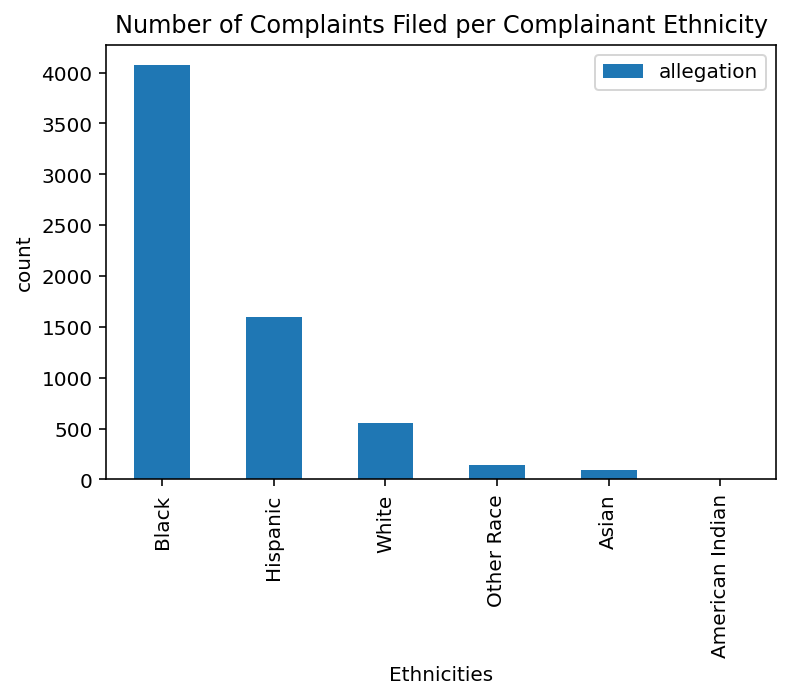

In [ ]:
#Distribution of number of complaints per individual ethnicity
physical1.groupby("complainant_ethnicity").count().reset_index().sort_values(by="allegation",ascending=False).plot(kind="bar",y="allegation",x="complainant_ethnicity")
plt.xlabel("Ethnicities")
plt.ylabel("count")
plt.title("Number of Complaints Filed per Complainant Ethnicity")

The distribution of the number of allegations made against officer's of different ethnicities shows that they are the most common. So far, complainants are significantly more likely to be black or hispanic and officer's facing the allegations are more likely to be white.

Text(0.5, 1.0, 'Number of Complaints Filed per Officer Ethnicity')

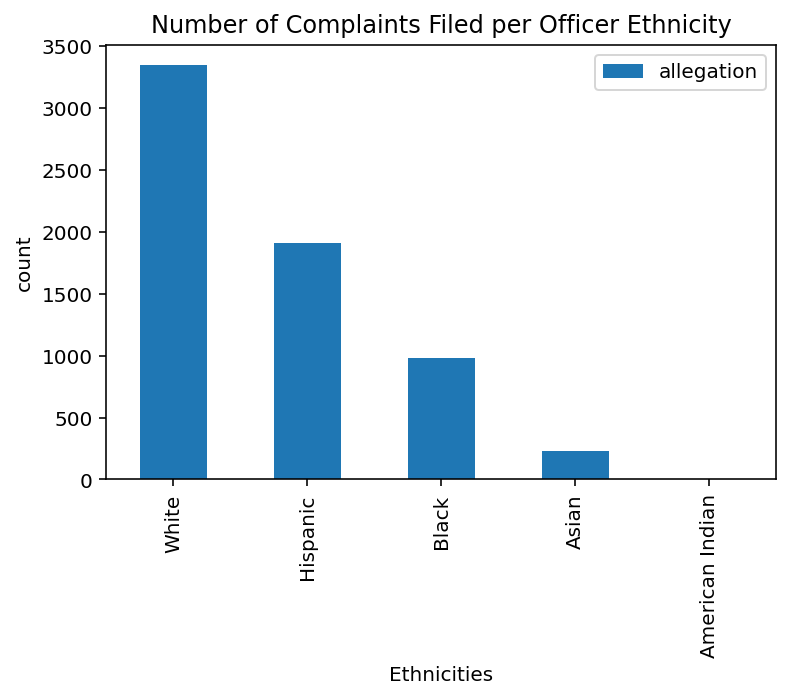

In [ ]:
#Distribution of number of complaints per officer ethnicity
physical1.groupby("mos_ethnicity").count().reset_index().sort_values(by="allegation",ascending=False).plot(kind="bar",y="allegation",x="mos_ethnicity")
plt.xlabel("Ethnicities")
plt.ylabel("count")
plt.title("Number of Complaints Filed per Officer Ethnicity")

However, it is important to note that the CCRB only substantiate a very small chunk of the number of excessive force allegations they receive. We will be assessing the distribution of complainant_ethnicities within this small group.

<AxesSubplot:xlabel='board_disposition'>

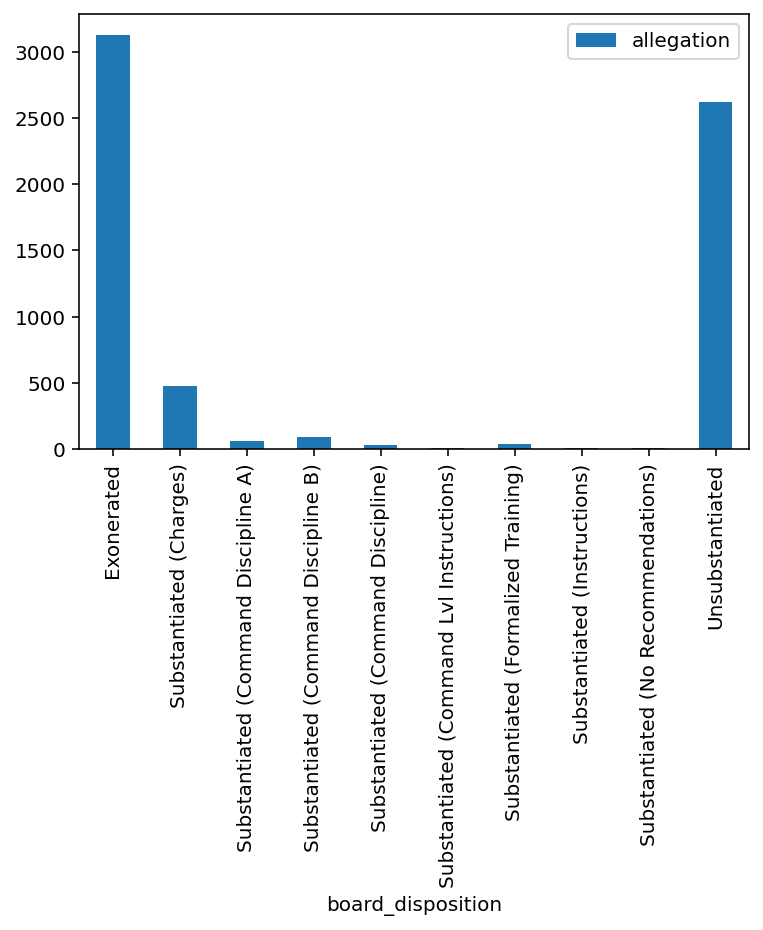

In [ ]:
#Bar plot, most physical force complaints are ultimately not substantiated
physical1.groupby("board_disposition").count().reset_index().plot(kind="bar",x="board_disposition",stacked=False,y="allegation")

The trend of allegations made per year can demonstrate any possible deviations that may have occured when this data was being recorded. Notably, there is a dip around 2017-2019. This means that we can check if the data we have been observing shifts as a result of this dip.

<AxesSubplot:title={'center':'Distribution of Number of Allegations Made Per Year'}, xlabel='year_received'>

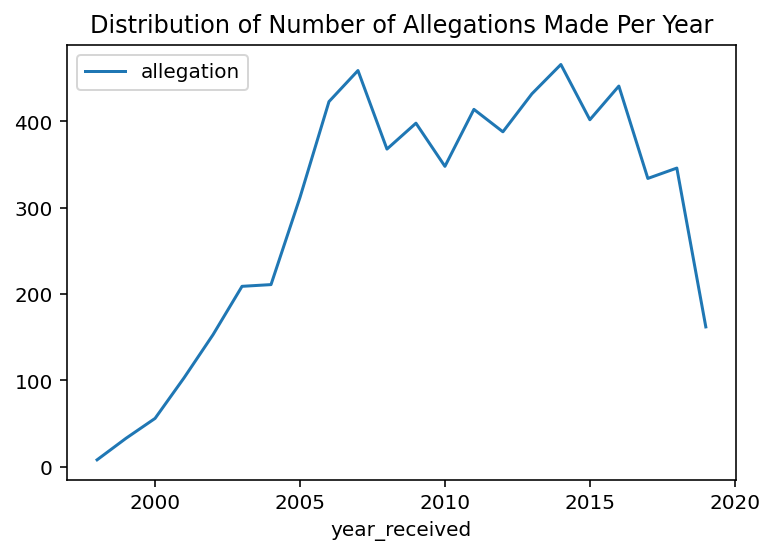

In [ ]:
#Lineplot for number of allegations received per year
physical1.groupby("year_received").count().reset_index().plot(kind="line",x="year_received",y="allegation",title="Distribution of Number of Allegations Made Per Year")

By visualizing the scatterplot of the month and number of allegations made, there is a notable dip in number of allegations per month so we will see if this affects or skews the previous statistics observed.

<AxesSubplot:title={'center':'Distribution of Number of Allegations Made Per Month'}, xlabel='date', ylabel='allegation'>

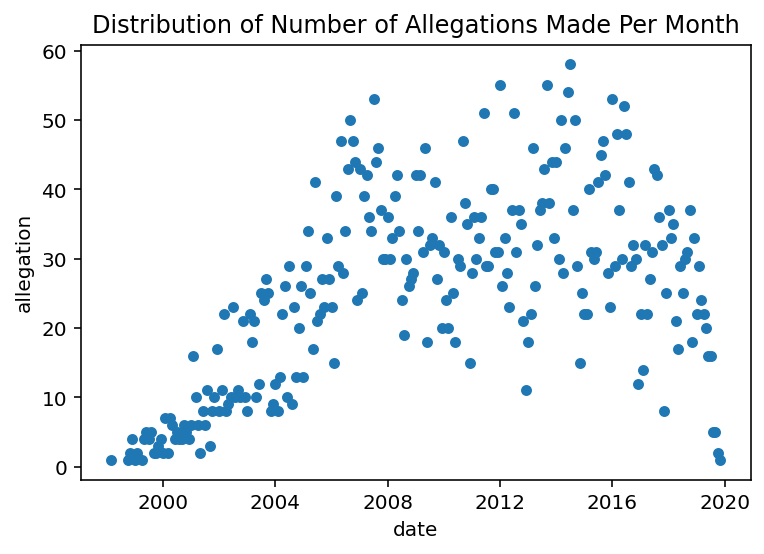

In [ ]:
physical1.groupby("date").count().reset_index().plot(kind="scatter",x="date",y="allegation",title="Distribution of Number of Allegations Made Per Month")

However, upon evaluation of this time frame it is clear that order and distribution count of complainant_ethnicity count remains the same.

In [ ]:
physical1[physical1["year_received"]>=2017].groupby(["year_received","complainant_ethnicity"]).count().reset_index().groupby(["complainant_ethnicity"]).sum()["mos_ethnicity"]

complainant_ethnicity
American Indian      2
Asian               22
Black              464
Hispanic           222
Other Race          27
White              105
Name: mos_ethnicity, dtype: int64

Through a pivot table, the number of allegations made by white and non-white are both visualized and will be used to get proportions.

In [ ]:
#Pivot table of number of allegations made by white and nonwhhite complainants
counts=pd.pivot_table(data=physical1.groupby("white_nonwhite").count(),index="white_nonwhite",values="allegation")
counts

,allegation
white_nonwhite,
White,553
nonwhite,5913


A second pivot table is created to find the number of substantiated claims for the two different groups.

In [ ]:
#Pivot table of number of substantiated allegations made by white and nonwhhite complainants
substantiated=pd.pivot_table(data=physical1[physical1["board_disposition"].str.contains("Substantiated")].groupby("white_nonwhite").count().reset_index(),index="white_nonwhite",values="allegation")
substantiated

,allegation
white_nonwhite,
White,75
nonwhite,635


The final pivot table shows the proportion of allegations that are substantiated for each complainant group. White is around 33% higher.

In [ ]:
#Pivot table of proportion of substantiated allegations made by white and nonwhhite complainants
proportions=substantiated/counts
proportions

,allegation
white_nonwhite,
White,0.135624
nonwhite,0.107390


### Assessment of Missingness

Finding the null values in our original dataframe that was preserved for missingness assessment.

In [ ]:
#Get null vales for complainant ethnicities
physical["com_ethnicity_isnull"]=physical.complainant_ethnicity.isnull()

Distribution of officer ethnicity and missingness of complainant ethnicity in order to assess missingness quality of complainant_ethnicity. Visually, complainant_ethnicity is missing more often if the officer is white in relation to the other ethnicities who have more False values for null than True.

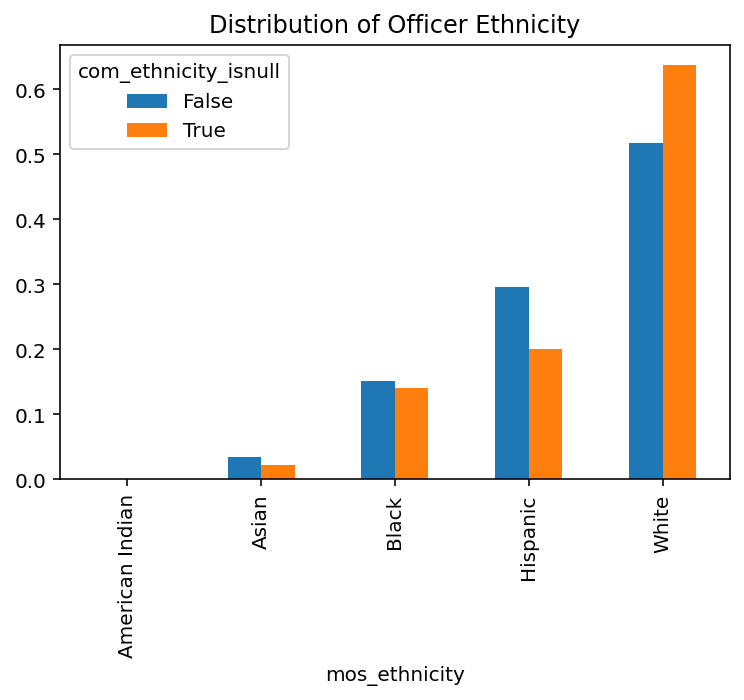

In [ ]:
#Distribution of officer ethnicity and missingness of complainant ethnicity
emp_distribution=physical.pivot_table(columns="com_ethnicity_isnull",index="mos_ethnicity",values=None,aggfunc="size").fillna(0).apply(lambda x: x/x.sum())
emp_distribution.plot(kind="bar",title="Distribution of Officer Ethnicity");

Pivot table to be used for the missingness TVD test since both variables are categorical.

In [ ]:
#Pivot table for officer ethnicity effect on missingness of complainant ethnicity
emp_distribution

com_ethnicity_isnull,False,True
mos_ethnicity,,
American Indian,0.000773,0.000000
Asian,0.035107,0.022222
Black,0.151562,0.141026
Hispanic,0.295237,0.200000
White,0.517321,0.636752


Finding the observed TVD.

In [ ]:
#observed TVD
obs_tvd=np.sum(np.abs(emp_distribution.diff(axis=1).iloc[:,-1]))/2
obs_tvd

0.11943076341467929

Permutation test to assess complainant_ethnicity missingness dependency on mos_ethnicity.

In [ ]:
#Permutation test
n=1000
officer_ethn=physical.copy()[["mos_ethnicity","com_ethnicity_isnull"]]
tvds=[]
for i in range(n):
    shuffled_off=officer_ethn["mos_ethnicity"].sample(replace=False,frac=1).reset_index(drop=True)
    shuffled=officer_ethn.assign(**{'Shuffled Ethnicity': shuffled_off})
    shuffled_emp=shuffled.pivot_table(index="Shuffled Ethnicity",columns="com_ethnicity_isnull",values=None,aggfunc="size").fillna(0).apply(lambda x:x/x.sum())
    tvd=np.sum(np.abs(shuffled_emp.diff(axis=1).iloc[:,-1]))/2
    tvds.append(tvd)

Observed TVD is clearly not near the test distribution but still will check p-value.

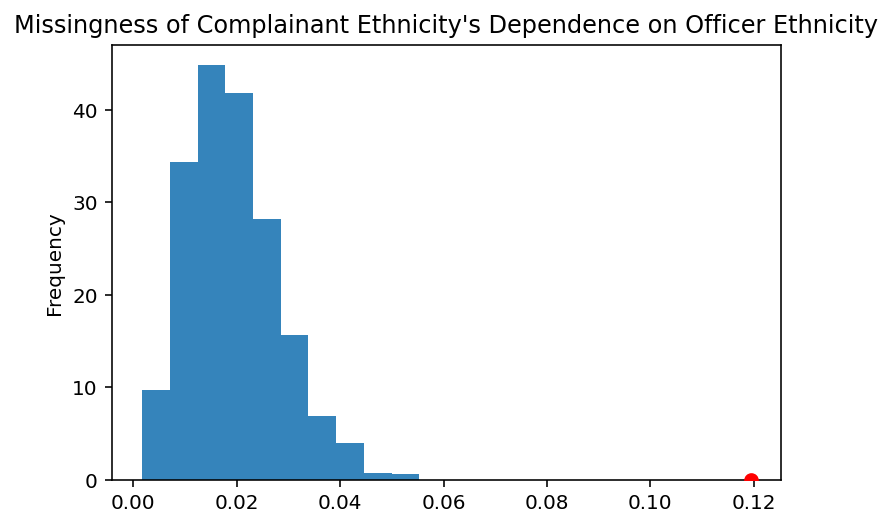

In [ ]:
#Histogram of missingness of complainant ethnicity's dependence on officer ethnicity
pd.Series(tvds).plot(kind="hist",density=True,alpha=0.9,title="Missingness of Complainant Ethnicity's Dependence on Officer Ethnicity")
plt.scatter(obs_tvd,0,color="red",s=40,zorder=10)

P-value being 0 with a significance level of 0.01 demonstrates that the complainant_ethnicity missingness is dependent on mos_ethnicity.

In [ ]:
#p-value
np.count_nonzero(tvds>=obs_tvd) / len(tvds)

0.0

Now will assess complainant_ethnicity missingness dependency on mos_gender. It is proportionally null more often for male officers than female.

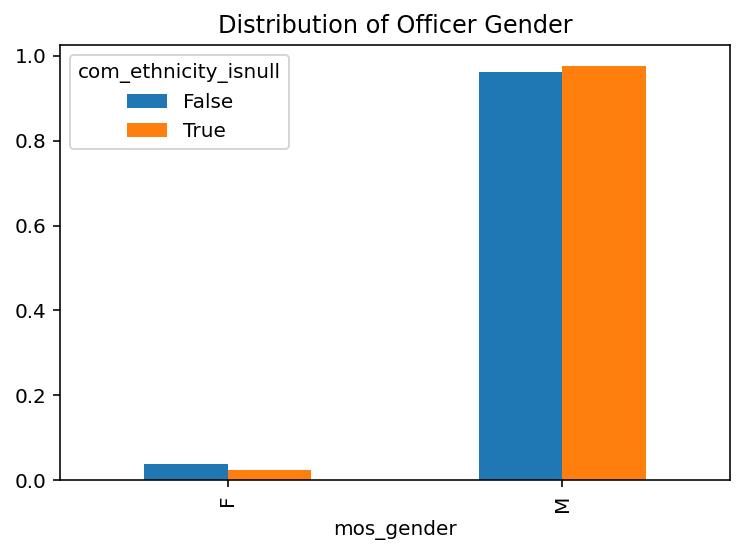

In [ ]:
#Distribution for officer gender effect on missingness of complainant ethnicity
emp_distribution1=physical.pivot_table(columns="com_ethnicity_isnull",index="mos_gender",values=None,aggfunc="size").fillna(0).apply(lambda x: x/x.sum())
emp_distribution1.plot(kind="bar",title="Distribution of Officer Gender");

Pivot table to be used for our permutations test for officer gender effect on missingness of complainant ethnicity.

In [ ]:
#Pivot table for officer gender effect on missingness of complainant ethnicity
emp_distribution1

com_ethnicity_isnull,False,True
mos_gender,,
F,0.037581,0.023932
M,0.962419,0.976068


Observed TVD.

In [ ]:
#Observed TVD
obs_tvd1=np.sum(np.abs(emp_distribution1.diff(axis=1).iloc[:,-1]))/2
obs_tvd1

0.013649570005895397

Permutation test

In [ ]:
#Permutation test
n=1000
gen=physical.copy()[["mos_gender","com_ethnicity_isnull"]]
tvds1=[]
for i in range(n):
    shuffled_gen=gen["mos_gender"].sample(replace=False,frac=1).reset_index(drop=True)
    shuffled=gen.assign(**{'Shuffled Gender': shuffled_gen})
    shuffled_emp1=shuffled.pivot_table(index="Shuffled Gender",columns="com_ethnicity_isnull",values=None,aggfunc="size").fillna(0).apply(lambda x:x/x.sum())
    tvd1=np.sum(np.abs(shuffled_emp1.diff(axis=1).iloc[:,-1]))/2
    tvds1.append(tvd1)

Histogram of TVDs for missingness of complainant ethnicity's dependence on the officer's gender.

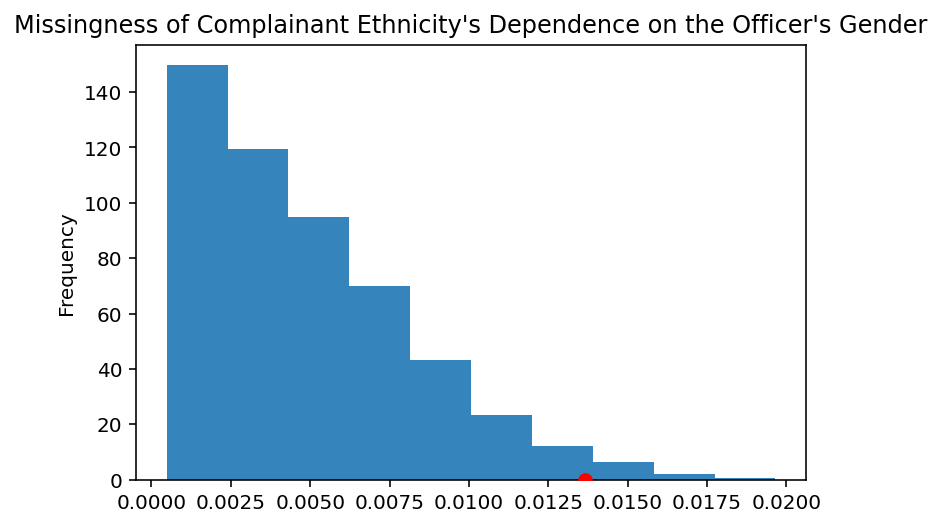

In [ ]:
#Histogram of missingness of complainant ethnicity's dependence on the officer's gender
pd.Series(tvds1).plot(kind="hist",density=True,alpha=0.9,title="Missingness of Complainant Ethnicity's Dependence on the Officer's Gender")
plt.scatter(obs_tvd1,0,color="red",s=40,zorder=10)

This p-value is greater than the significance value of 0.01 which means that the missingness of complainant ethnicity's is not dependent on the officer's gender.

In [ ]:
#p-value,significance level = 0.01
np.count_nonzero(tvds1>=obs_tvd1) / len(tvds1)

0.021

### Hypothesis Test

Null Hypothesis= The distribution of the NYPD civilian excessive force complaints that are found to be substantiated is similar among those who identified themselves as white and those who did not.

Alternative Hypothesis= The distributions of NYPD substantiated excessive force complaints are different amongst the two.

Test Statistic= Total Variation Distance, two categorical variables.

Significance Level= 0.01

Pivot table of number of allegations proportionalized.

In [ ]:
#Number of allegations
counts1=counts/counts.sum(axis=0)
counts1

,allegation
white_nonwhite,
White,0.085524
nonwhite,0.914476


Pivot table of number of substantiated allegations proportionalized.

In [ ]:
#Number of substantiated complaints
substantiated1=substantiated/substantiated.sum(axis=0)
substantiated1=substantiated1.rename(columns={"allegation":"substantiated"})
substantiated1

,substantiated
white_nonwhite,
White,0.105634
nonwhite,0.894366


Final pivot table to be used for hypothesis testing.

In [ ]:
#Pivot table with proportions of number of allegations and number substantiated
success=pd.concat([counts1,substantiated1],axis=1)
success

,allegation,substantiated
white_nonwhite,,
White,0.085524,0.105634
nonwhite,0.914476,0.894366


Bar chart of proportion of number of allegations and number substantiated.

<AxesSubplot:title={'center':'Distributions of Allegations Made and Allegations Substantiated'}, xlabel='white_nonwhite'>

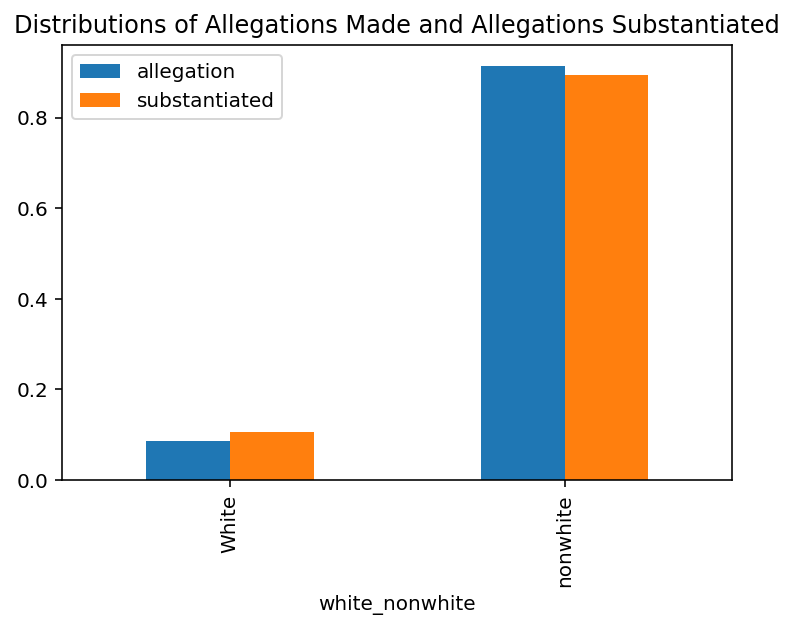

In [ ]:
#Distribution of number of allegations and number substantiated
success.plot(kind="bar",title="Distributions of Allegations Made and Allegations Substantiated")

The observed TVD.

In [ ]:
#Observed TVD for hypothesis test
obs_tvd2=np.sum(np.abs(success.diff(axis=1).iloc[:,-1]))/2
obs_tvd2

0.020109521963205146

Hypothesis test using a test statistic of TVDs since it there are two categorical variables.

In [ ]:
#Hypothesis test
rand_allegations=np.random.multinomial(counts.sum(axis=0).values[0],success["allegation"],size=1000)
rand_allegations = rand_allegations / counts.sum(axis=0).values[0]
tvds2=np.sum(np.abs(rand_allegations-success["allegation"].values),axis=1) / 2

Histogram of TVDs

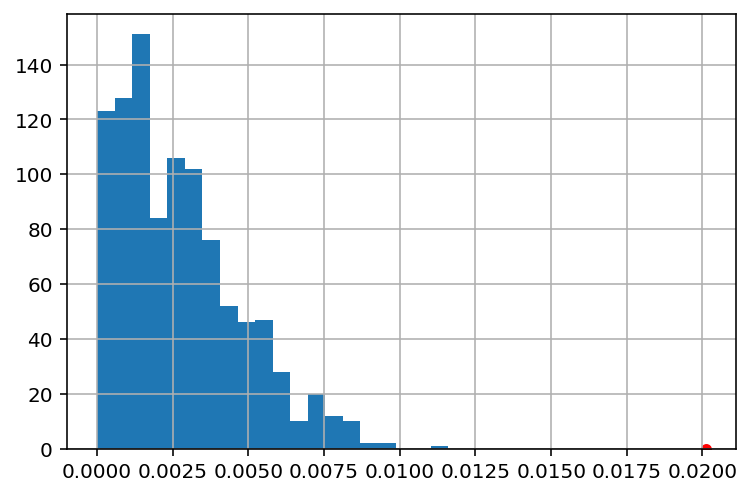

In [ ]:
#Distribution of TVDs
pd.Series(tvds2).hist(bins=20)
plt.scatter(obs_tvd2,0,color="red",s=20)

P-value of 0.0 means we can reject the null hypothesis.

In [ ]:
#p-value
np.count_nonzero(tvds2>=obs_tvd2) / len(tvds2)

0.0

Second hypothesis test that is the same but will leave the ethnicities ungrouped just to check.

Pivot table counts of allegations.

In [ ]:
#Original ungrouped ethnicities allegations proportions
counts2=pd.pivot_table(data=physical1.groupby("complainant_ethnicity").count(),index="complainant_ethnicity",values="allegation")
counts_all = counts2 / counts2.sum(axis=0)
counts_all

,allegation
complainant_ethnicity,
American Indian,0.001083
Asian,0.014847
Black,0.629756
Hispanic,0.246830
Other Race,0.021961
White,0.085524


Pivot table counts of allegations.

In [ ]:
#Original ungrouped ethnicities substantiated allegations proportions
substantiated2=pd.pivot_table(data=physical1[physical1["board_disposition"].str.contains("Substantiated")].groupby("complainant_ethnicity").count().reset_index(),index="complainant_ethnicity",values="allegation")
substantiated_all = substantiated2 / substantiated2.sum(axis=0)
substantiated_all=substantiated_all.rename(columns={"allegation":"substantiated"})
substantiated_all

,substantiated
complainant_ethnicity,
American Indian,0.001408
Asian,0.016901
Black,0.576056
Hispanic,0.274648
Other Race,0.025352
White,0.105634


Pivot table with proportions of each ethnicities allegations and substantiated claims with respect to the others.

In [ ]:
#Single pivot table for ungrouped ethnicities allegations proportions
success_all=pd.concat([counts_all,substantiated_all],axis=1)
success_all

,allegation,substantiated
complainant_ethnicity,,
American Indian,0.001083,0.001408
Asian,0.014847,0.016901
Black,0.629756,0.576056
Hispanic,0.246830,0.274648
Other Race,0.021961,0.025352
White,0.085524,0.105634


Distribution of proportion of allegations made per complainant_ethnicity and those substantiated.

<AxesSubplot:title={'center':'Distributions of Allegations Made and Allegations Substantiated'}, ylabel='complainant_ethnicity'>

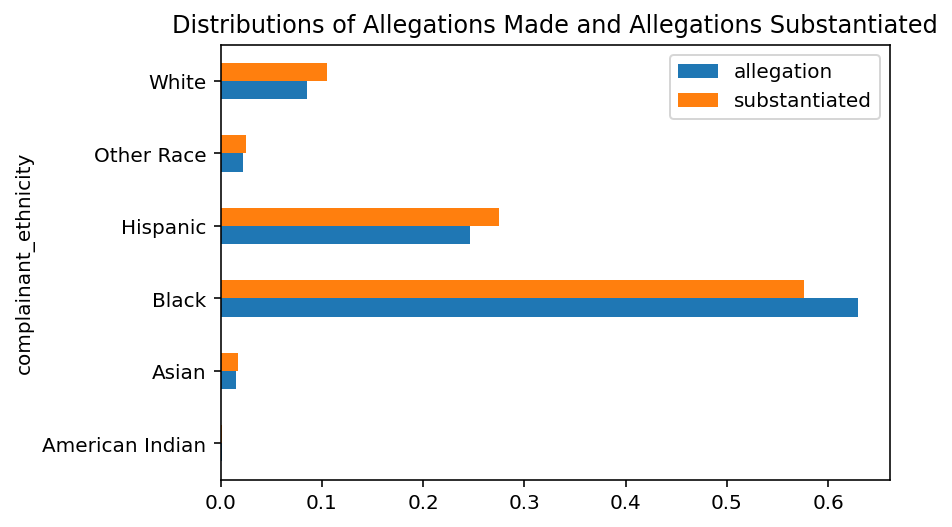

In [ ]:
#Bar plot of distributions of allegations made and allegations substantiated
success_all.plot(kind="barh",title="Distributions of Allegations Made and Allegations Substantiated")

Observed TVD.

In [ ]:
#Observed TVD
obs_tvd3=np.sum(np.abs(success_all.diff(axis=1).iloc[:,-1]))/2
obs_tvd3

0.053699306883677564

Hypothesis test for all ethnicities instead of only white and nonwhite.

In [ ]:
#Hypothesis test
rand_allegations_all=np.random.multinomial(counts.sum(axis=0).values[0],success_all["allegation"],size=1000)
rand_allegations_all = rand_allegations_all / counts.sum(axis=0).values[0]
tvds_all=np.sum(np.abs(rand_allegations_all-success_all["allegation"].values),axis=1) / 2

Distribution for TVDs of all ethnicities ungrouped.

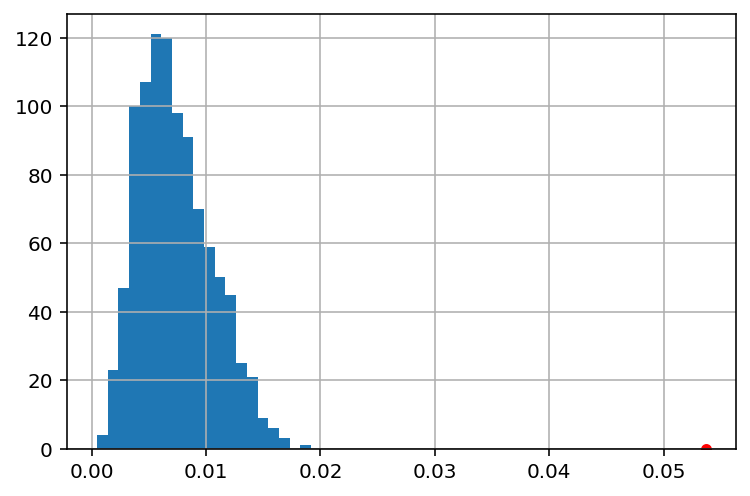

In [ ]:
#Histogram of TVDs
pd.Series(tvds_all).hist(bins=20)
plt.scatter(obs_tvd3,0,color="red",s=20)

Additional p-value however initial hypothesis test already answers the research question.

In [ ]:
#p-value
np.count_nonzero(tvds_all>=obs_tvd3) / len(tvds_all)

0.0